## SALES PREDICTION
**Problem statement**
To build a model that predict the sales prediction of a product based on
advertising through Newspaper,TV and Radio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data understandig

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Data Preprocessing

**Exploratary Data analysis**

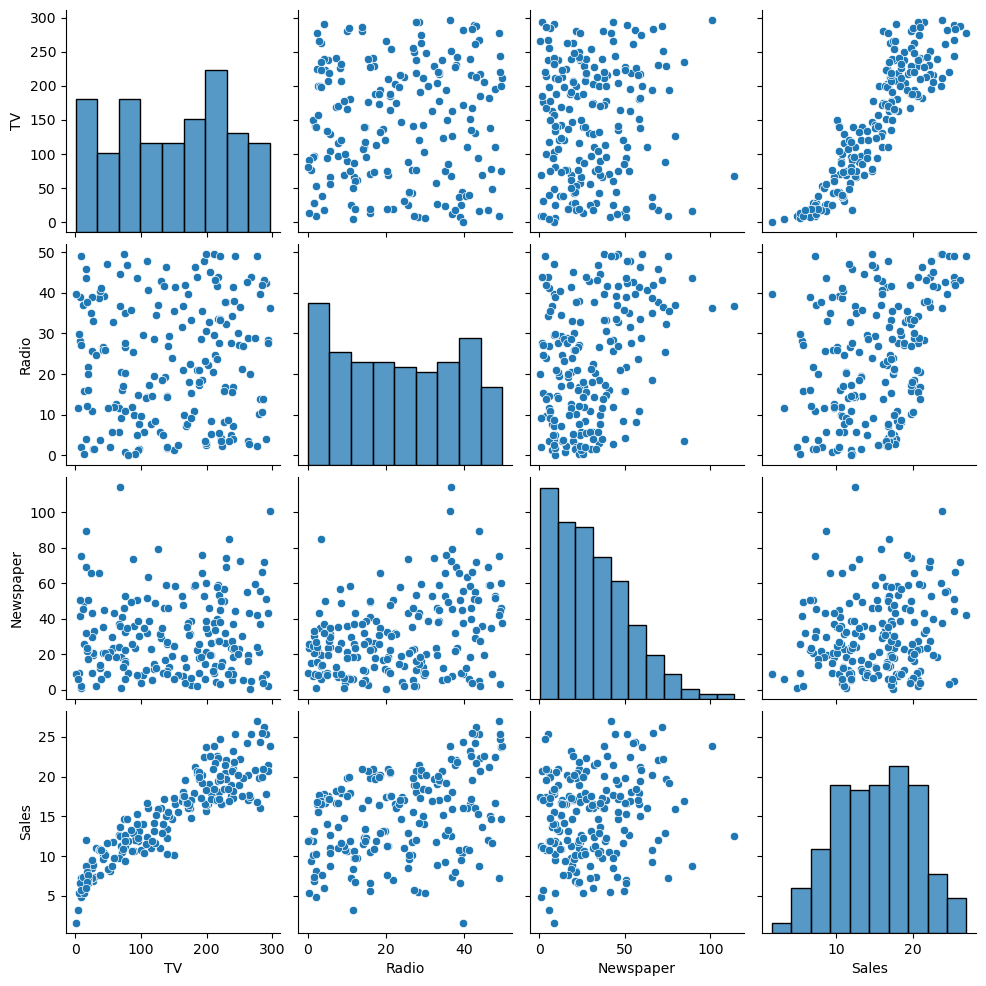

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


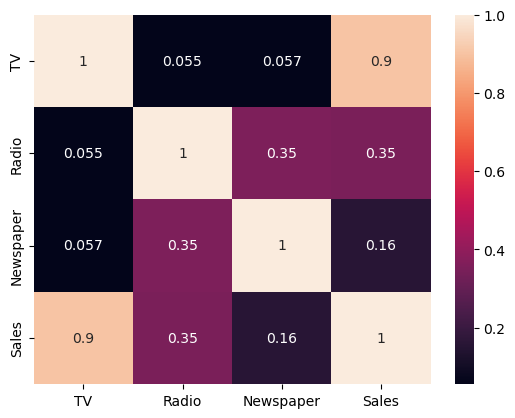

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### No data cleaning and data wrangling required

In [10]:
x=df.drop('Sales',axis=1)
y=df["Sales"]


## Train Test split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

##prediction
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

##evalution
print("train r2:",model.score(x_train,y_train))
print("test r2:",model.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(model,x,y,cv=5).mean())

train r2: 0.9001425782494181
test r2: 0.908487672838706
cross_val_score: 0.8953723525274103


## checking the assumptions

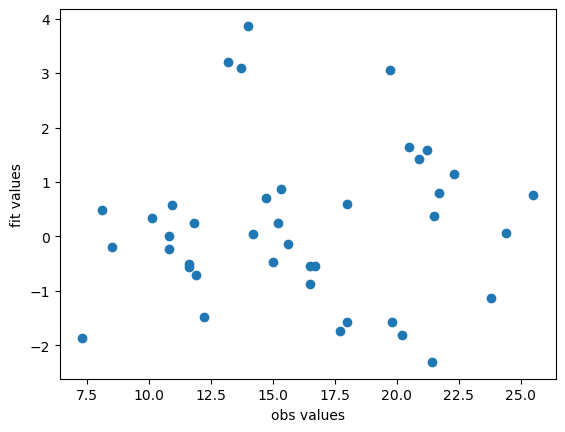

In [13]:
## linearity of errors
test_err=y_test-ypred_test
plt.scatter(y_test,test_err)
plt.xlabel("obs values")
plt.ylabel("fit values")
plt.show()

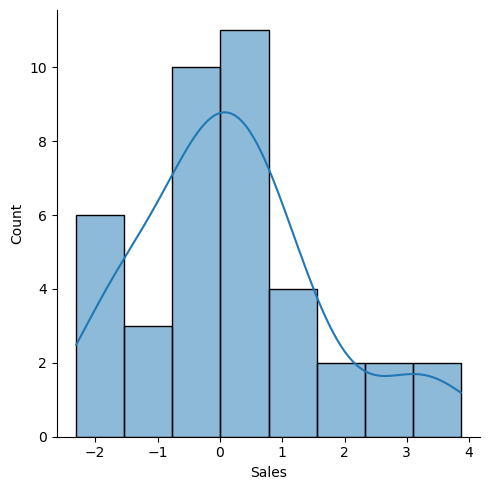

In [14]:
## normality of errors
sns.displot(test_err,kde=True)
plt.show()

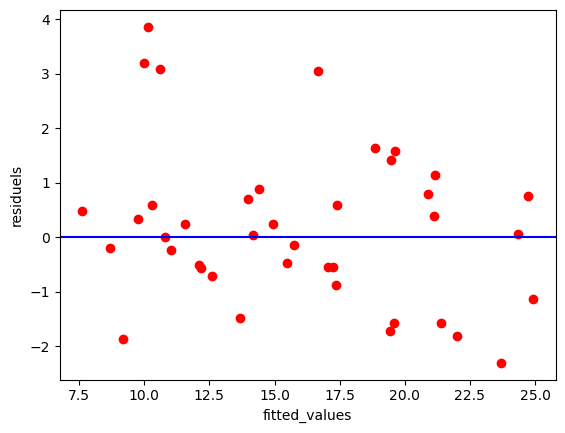

In [15]:
test_err.skew()
## equal variance of errors
plt.scatter(ypred_test,test_err,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuels")
plt.show()

In [16]:
## added variable plot

In [17]:
import statsmodels.formula.api as smf
model1=smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           8.13e-99
Time:                        14:43:12   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
x[0]           0.0544      0.001     39.592      0.000       0.052       0.057
x[1]           0.1070      0.008     12.604      0.000       0.090       0.124
x[2]           0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Another way to check the significance of the variable**

**-->Added variable plot**

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


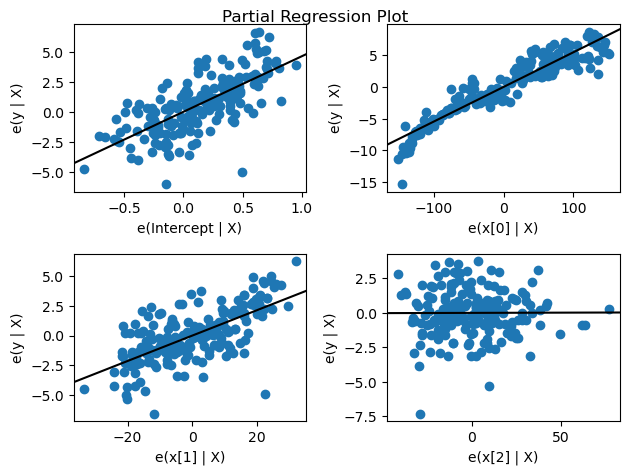

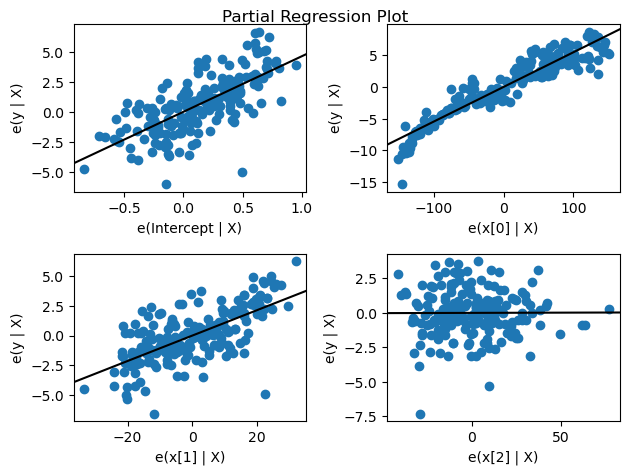

In [18]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

**There is no significance for newspaper**

## Final Model

In [19]:
x=df[["TV",'Radio']]
y=df["Sales"]


from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

##prediction
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

##evalution
print("train r2:",model.score(x_train,y_train))
print("test r2:",model.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(model,x,y,cv=5).mean())

train r2: 0.9001425782494181
test r2: 0.908487672838706
cross_val_score: 0.8958535029714982


## deployment of the model

In [20]:
from joblib import dump
dump(model,"sales_prediction.joblib")

['sales_prediction.joblib']